In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Para visualizações mais avançadas

In [ ]:
df = pd.read_csv('dados.csv')

In [ ]:
df.head()

,id,title,status,seller_id,price,category_id,initial_quantity,listing_type_id,domain_id,date_created,last_updated,seller_city,seller_state,seller_country
0,MLA1400503849,Chromecast With Google Tv De Voz 4ª Generación...,active,1250965884,178999.0,MLA352001,163,gold_pro,MLA-STREAMING_MEDIA_DEVICES,2023-12-28T17:21:27.000Z,2024-09-12T23:44:19.000Z,Junín,Buenos Aires,Argentina
1,MLA1430559247,Google Chromecast 4 Generación Con Google Tv H...,active,126269313,129999.0,MLA352001,306,gold_pro,MLA-STREAMING_MEDIA_DEVICES,2024-06-03T17:07:51.085Z,2024-09-13T00:27:40.625Z,Palermo,Capital Federal,Argentina
2,MLA1433713863,Onn Google Tv Fhd Streaming Stick Device 2023...,active,621229920,48906.0,MLA352001,117,gold_special,MLA-STREAMING_MEDIA_DEVICES,2024-06-19T20:22:00.243Z,2024-09-13T00:16:20.599Z,Rosario,Santa Fe,Argentina
3,MLA1757370086,Smart Tv Onn Uhd Streaming Device 2° Gen 4k C...,active,541665065,79999.0,MLA352001,114,gold_pro,MLA-STREAMING_MEDIA_DEVICES,2024-05-01T00:20:02.000Z,2024-09-12T23:28:12.000Z,San Cristóbal,Capital Federal,Argentina
4,MLA1449193019,Chromecast Google Ga03131 Tv Hd 8gb 2gb Ram 60...,active,154567859,142000.0,MLA352001,10,gold_pro,MLA-STREAMING_MEDIA_DEVICES,2024-09-10T14:47:22.556Z,2024-09-12T22:08:55.732Z,Núñez,Capital Federal,Argentina


In [ ]:
df.dtypes

,0
id,object
title,object
status,object
seller_id,int64
price,float64
category_id,object
initial_quantity,int64
listing_type_id,object
domain_id,object
date_created,object


In [ ]:
df.shape

(198, 14)

In [ ]:
df.describe()

,seller_id,price,initial_quantity
count,1.980000e+02,1.980000e+02,198.000000
mean,3.688057e+08,2.411651e+05,392.424242
std,4.499086e+08,1.574817e+06,1992.340600
min,2.117380e+05,4.999000e+03,1.000000
25%,8.542921e+07,6.999250e+04,1.000000
50%,1.872056e+08,8.996750e+04,25.500000
75%,3.601254e+08,1.317490e+05,169.750000
max,1.946156e+09,2.222222e+07,25998.000000


In [ ]:
for col in df.columns:
    print(f"{col}:{(16-len(col)) * ' '} unique values --> {df[col].nunique()}")

id:               unique values --> 149
title:            unique values --> 138
status:           unique values --> 1
seller_id:        unique values --> 105
price:            unique values --> 120
category_id:      unique values --> 2
initial_quantity: unique values --> 65
listing_type_id:  unique values --> 3
domain_id:        unique values --> 2
date_created:     unique values --> 149
last_updated:     unique values --> 149
seller_city:      unique values --> 76
seller_state:     unique values --> 6
seller_country:   unique values --> 1


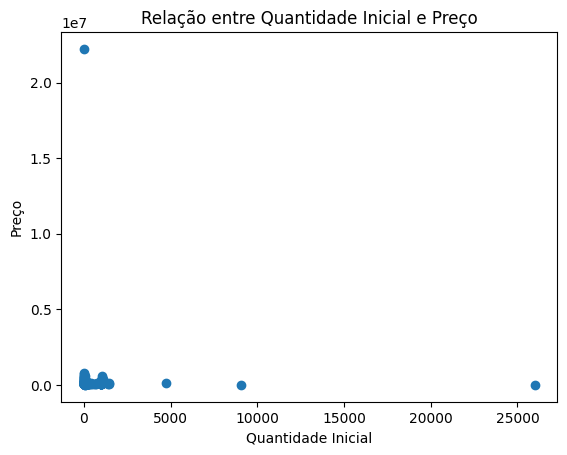

In [ ]:
plt.scatter(df['initial_quantity'], df['price'])
plt.xlabel('Quantidade Inicial')
plt.ylabel('Preço')
plt.title('Relação entre Quantidade Inicial e Preço')
plt.show()

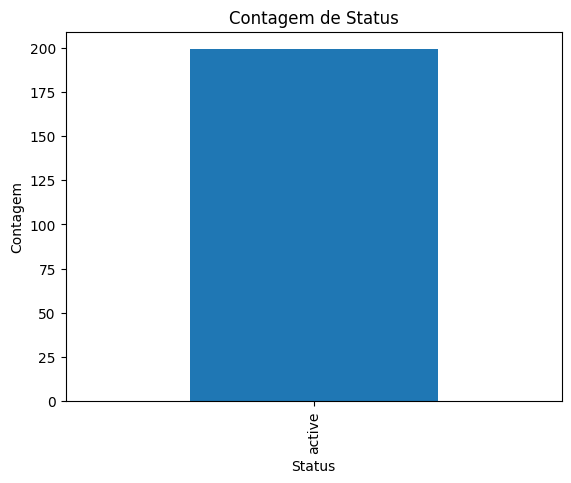

In [ ]:
df['status'].value_counts().plot(kind='bar')
plt.xlabel('Status')
plt.ylabel('Contagem')
plt.title('Contagem de Status')
plt.show()

In [ ]:
"Preço Médio por Estado"
average_price_by_state = df.groupby('seller_state')['price'].mean()
print(average_price_by_state)

seller_state
Buenos Aires       139205.180625
Capital Federal    357454.733942
Córdoba            132832.857143
Entre Ríos         139234.000000
La Rioja           170000.000000
Santa Fe           119772.500000
Name: price, dtype: float64


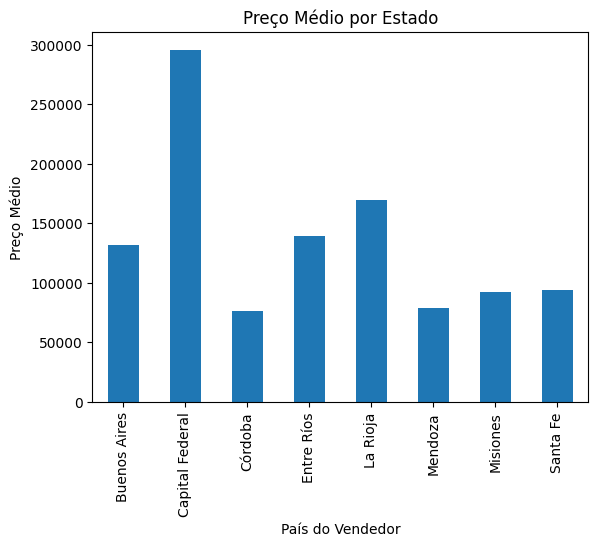

In [ ]:
df.groupby('seller_state')['price'].mean().plot(kind='bar')
plt.xlabel('País do Vendedor')
plt.ylabel('Preço Médio')
plt.title('Preço Médio por Estado')
plt.show()

<Axes: xlabel='date_created', ylabel='price'>

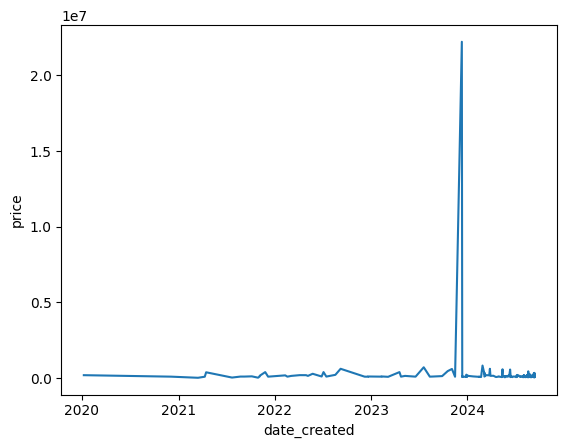

In [ ]:
# Convert 'date_created' to datetime format
df['date_created'] = pd.to_datetime(df['date_created'])

# Plot a time series of 'price' over time
sns.lineplot(x='date_created', y='price', data=df)

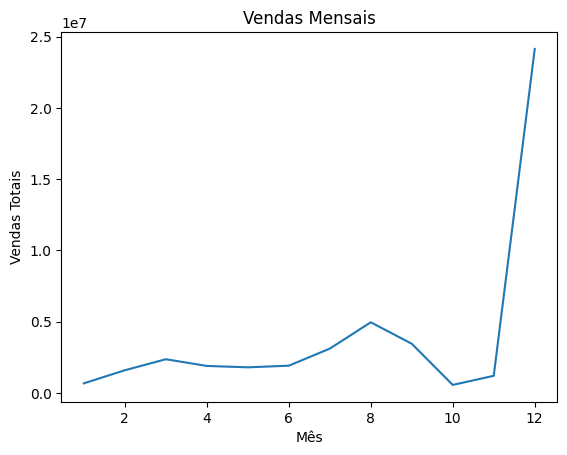

In [ ]:
# Convertendo a coluna 'date_created' para datetime
df['date_created'] = pd.to_datetime(df['date_created'])

# Agrupando por mês e calculando a soma das vendas
monthly_sales = df.groupby(df['date_created'].dt.month)['price'].sum()
monthly_sales.plot()
plt.xlabel('Mês')
plt.ylabel('Vendas Totais')
plt.title('Vendas Mensais')
plt.show()